<a href="https://colab.research.google.com/github/kabilan942/Learnings/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learnng

## Machine Learning Workflow

### Introduction

In **Machine Learning**, we train a model to learn patterns from data on its own without explicitly programming it. The model is then used to predict something from an unseen data. The prediction cannot be **gauranteed** to be correct but has **high likelihood**.

**The Machine Learning Workslow:**

1. Data Collection.
2. Data Exploration and Wrangling.
3. Data Preparation (Feature Engineering).
4. Building and training a model.
5. Evaluating the model performance.
6. Fine-tuning the model.
7. Evaluating the model performance.

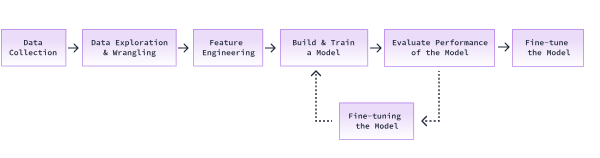

### Supervised Machine Learning

It's supervised because our **model learns from existing data and the corresponding labels**. There are usually two types of labels that we encounter:

1. **Continuous labels**:
For example, we could be working with a dataset that contains features that describe different types of cars, and the labels could be the price of those cars. Our model would then learn to predict the price of a car, given those features as input.

2. **Categorical labels**:
Our breast cancer dataset has only two labels- `benign` and `malignant`, or `0` and `1`. Each observation is categorized by its own label or class.

If the label or target we want to predict is a categorical value, we call it a classification task. The model, a classifier, will try to classify a given set of inputs into a category.

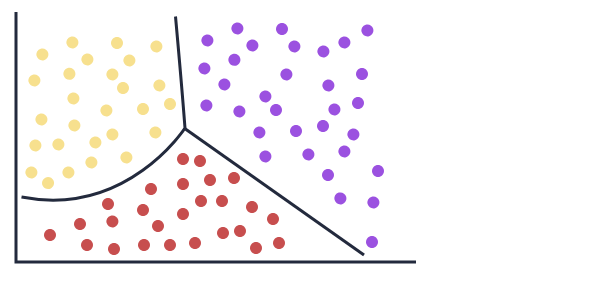

The points above are the features in a 2D space and the colours respresent labels. The space is called as a **feature space** and the points lying on it is called a **feature vector**.

The lines divide the feature space into corresponding labels and is called as a **decision boundary**. This decision boundary is our classifier.

If we had more features, it would be an n-dimensional feature space and the decision boundary would be an hyperplane.

The decision boundary can be represented using parametric equations and in supervised ML the model find these parameters of decision boundary from data that seperate the labels.

### Data Collection and Exploration

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# "as_frame = True"  will return the data attribute as a pandas DataFrame and the target attribute as a Series.
cancer_data = load_breast_cancer(as_frame=True)

cancer_df = cancer_data['data']
cancer_df['target'] = cancer_data['target']

print('The shape of the dataset:')
print(cancer_df.shape)

The shape of the dataset:
(569, 31)


The above dataset has 30 columns describing the dataset called **features** and the last column describing whether the patient has Malignant (label = 1) or Benign (label = 0); represting two **classes of the target variable**, which we aim to predict using machine learning. The dataset has 569 **observations**, technically called as **feature vectors** (an n-dimensional vector of features).

In [ ]:
print('Number of missing values in each columns:')
print(cancer_df.isnull().sum())
print()

print('Class distribution in target column:')
print(cancer_df['target'].value_counts())
print()

print('Summary statistics for the dataset:')
print(cancer_df.describe())

Number of missing values in each columns:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Class distribution in target column:
1    357

### Data Preparation

The data that we use to train our model is called **training data**, a training set or a training dataset.

This unseen data is called **test data**, a test set or a test dataset. It's used to evaluate the model's performance.

Usually before splitting the dataset into train-test, some data cleaning is involved. Since there is no missing value in this dataset, we directly proceed to splitting the dataset using `train_test_split` from `sklearn.model_selection`.

In [ ]:
from sklearn.model_selection import train_test_split

X = cancer_df.drop(['target'], axis=1)
y = cancer_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=417)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(483, 30) (86, 30) (483,) (86,)


Our goal with training our model is to see how well it can perform on the test set or on unseen data. However, if we repeatedly evaluate the model on the test set and re-train it, we are introducing **bias**.

Our model will start to indirectly learn from our test set.

Due to this, we create a **validation set**, sometimes referred to as a **development set** or **dev set**. We can then train our model and evaluate it on the validation set. Depending on its performance on the validation set, we can re-train it with some tweaks and evaluate it again.

### Building and Training a Classifier

There are only two steps for building and training the model:

1. We first **instantiate the model**. This is similar to how we would instantiate a Python class. This step doesn't take any training data as input. We can, however, define and set the values for the parameters we saw in the documentation linked above.
2. We **fit the model** onto the training data features (`X`) and labels (`y`). Fitting the model is the same as training our model.

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(penalty='l2', loss='squared_hinge', C=10, random_state=417)

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, random_state=417)

### Evaluation

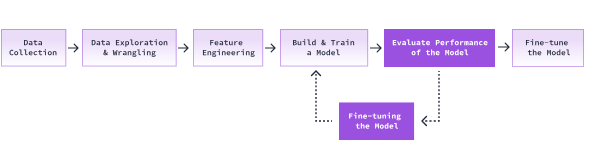

One of the most common ways to evaluate a classifier is to look at how accurate its predictions are. For a supervised learning task, we already know which class a particular observation belongs to.

We can use our model to predict the labels of our test data. We can then calculate the accuracy of our model by comparing those predictions to the actual labels.

`scikit-learn` provides a method `model.score()` that can calculate that accuracy.

In [ ]:
test_accuracy = model.score(X_test, y_test)
print(test_accuracy)

0.8255813953488372


### Fine-tuning the model

The model predicts the correct label with an accuracy of 82.558%. We can try the change the parameters of `LinearSVC` model to improve the performance (accuracy) of the classifier.

In [ ]:
model = LinearSVC(penalty='l2', loss='squared_hinge', C=20, max_iter=3500, random_state=417)

model.fit(X_train, y_train)

test_accuracy = model.score(X_test, y_test)
print(test_accuracy)

0.872093023255814


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The classifier's accuracy has increased from 82.56% to 87.21% !!

## K-Nearest Neighbours

**K-Nearest Algorithm:**

1. For an unseen data point, the algorithm calculates the distance between that point and all the observations across all features in the training dataset.

2. It sorts those distances in ascending order.

3. It selects `K` observations with the smallest distances from the above step. These `K` observations are the K-nearest neighbors of that unseen data point. Note that there should be at least `K ≥1` observations in the dataset.

4. It calculates which labels of those neighbors is the most common, and assigns that label to the unseen data point.

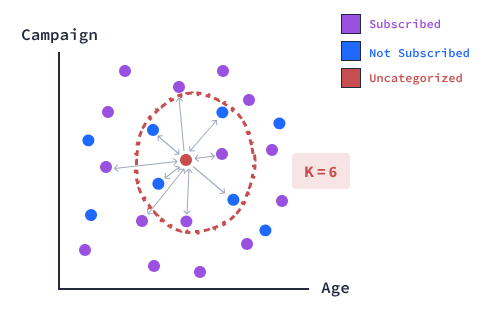

**Distance metrics:**

One of the most common distance metrics is the **Euclidean distance**. The Euclidean distance between two observations with n features is:

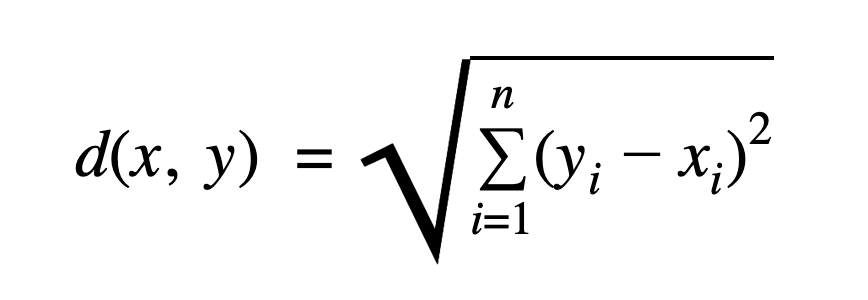

Note that, for each `i` in {1, 2, ..,n}:

*   `x_i` is the value for a feature for one observation, and
*   `y_i` the value for the same feature for another observation.



K-nearest neighbors is a bit of a unique case in supervised ML. It **works at the time of prediction** and it doesn't technically have a "training phase." The model **classifies** every new input by **comparing it to its neighbors**. Those **neighbors are from the training set.**

In [ ]:
import pandas as pd
banking_df = pd.read_csv("/content/subscription_prediction.csv")
banking_df.shape

(10122, 21)

In [ ]:
banking_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# replacing 'yes' with 1 and 'no' with 0 in target label
banking_df['y'] = banking_df['y'].replace('yes',1)
banking_df['y'] = banking_df['y'].replace('no',0)

In [ ]:
# randomly sampling train-test split with 85-15%
train_df = banking_df.sample(frac=0.85, random_state=417)
test_df = banking_df.drop(train_df.index, axis=0)

print(train_df['y'].value_counts())
print(test_df['y'].value_counts())

X_train = train_df.drop(['y'], axis=1)
y_train = train_df['y']

X_test = test_df.drop(['y'], axis=1)
y_test = test_df['y']


0    4647
1    3957
Name: y, dtype: int64
0    835
1    683
Name: y, dtype: int64


In [ ]:
def knn(feature, single_test_input, k):
    X_train['distance'] = ((X_train[feature]-single_test_input)**2)**0.5
    X_train.sort_values(['distance'])
    top_k_df = X_train[:6]
    if top_k_df.value_counts()[0]>top_k_df.value_counts()[1]:
        prediction = 0
    else:
        prediction = 1

    return prediction

print(knn('age', X_test[5], 3))

**User-defined function for KNN:**

In [ ]:
def knn(feature, single_test_input, k):
    # subtracting the value of single_test_input[feature] (scaler) from the series 'age' column of dataframe
    X_train['distance'] = abs(X_train[feature]-single_test_input[feature])
    # Series.nsmallest() function to find the first k smallest value
    prediction = y_train[X_train['distance'].nsmallest(n=k).index].mode()[0]

    return prediction

print(knn('age', X_test.iloc[417], 3))
print(y_test.iloc[417])

0
0


Accuracy when using "age" column with `k=3`:

In [ ]:
def knn(feature, single_test_input, k):
    X_train["distance"] = abs(X_train[feature] - single_test_input[feature])
    prediction = y_train[X_train["distance"].nsmallest(n=k).index].mode()[0]
    return prediction

y_pred = []
for i in range(X_test.shape[0]):
    pred = knn('age', X_test.iloc[i], 3)
    y_pred.append(pred)

X_test['age_predicted_y'] = y_pred


In [ ]:
count = 0
for i in range(X_test['age_predicted_y'].shape[0]):
    if X_test.iloc[i]['age_predicted_y']==y_test.iloc[i]:
        count+=1
print(count/X_test['age_predicted_y'].shape[0])

0.538866930171278


### Converting categorical columns to numerical:

In [ ]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

`pd.get_dummies()` creates one-hot encoded columns for all unique values in the column passed into the function.

`drop_first=True` when used, `n-1` columns are created instead of `n` with the dropped column represented by all `0`'s

In [ ]:
banking_df_copy = banking_df.copy()
banking_df_copy = pd.get_dummies(data=banking_df_copy, columns=['marital'], drop_first=True)
print(banking_df_copy.columns)

Index(['age', 'job', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'marital_married', 'marital_single',
       'marital_unknown'],
      dtype='object')


In [ ]:
banking_df['marital'].head()

0     married
1     married
2     married
3    divorced
4      single
Name: marital, dtype: object

In [ ]:
banking_df_copy[['marital_married', 'marital_single',
       'marital_unknown']].head()

,marital_married,marital_single,marital_unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,0
4,0,1,0


### Normalizing a numerical column

**Using min-max scaling to normalize `'age'` and `'campaign'` columns:**

In [ ]:
min_age = X_train['age'].min()
max_age = X_train['age'].max()
X_train['age'] = (X_train['age']-min_age)/(max_age-min_age)
X_test['age'] = (X_test['age']-min_age)/(max_age-min_age)

min_campaign = X_train['campaign'].min()
max_campaign = X_train['campaign'].max()
X_train['campaign'] = (X_train['campaign']-min_campaign)/(max_campaign-min_campaign)
X_test['campaign'] = (X_test['campaign']-min_campaign)/(max_campaign-min_campaign)

In [ ]:
X_train[['age', 'campaign']].head()

,age,campaign
7472,0.259259,0.02439
3408,0.469136,0.04878
5851,0.148148,0.00000
9132,0.777778,0.02439
3790,0.345679,0.02439


### Using sklearn API

In [ ]:
import pandas as pd
banking_df = pd.read_csv('/content/subscription_prediction.csv')

banking_df['y'] = banking_df['y'].replace('yes',1)
banking_df['y'] = banking_df['y'].replace('no',0)

In [ ]:
# splitting into train-val-test with 60-20-20 split

X = banking_df.drop(['y'], axis=1)
y = banking_df['y']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=417)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=417)

`scikit-learn` uses the training phase to set up such a data structure. For different algorithms, `scikit-learn` handles the training phase differently.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

ValueError: ignored

Produces an error because KNN calculates distance between features, and the dataset has categorical columns too.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6072 entries, 6446 to 6267
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             6072 non-null   int64  
 1   job             6072 non-null   object 
 2   marital         6072 non-null   object 
 3   education       6072 non-null   object 
 4   default         6072 non-null   object 
 5   housing         6072 non-null   object 
 6   loan            6072 non-null   object 
 7   contact         6072 non-null   object 
 8   month           6072 non-null   object 
 9   day_of_week     6072 non-null   object 
 10  duration        6072 non-null   int64  
 11  campaign        6072 non-null   int64  
 12  pdays           6072 non-null   int64  
 13  previous        6072 non-null   int64  
 14  poutcome        6072 non-null   object 
 15  emp.var.rate    6072 non-null   float64
 16  cons.price.idx  6072 non-null   float64
 17  cons.conf.idx   6072 non-null 

In [ ]:
X_train['default'].value_counts()

no         5081
unknown     991
Name: default, dtype: int64

In [ ]:
X_train = pd.get_dummies(data=X_train, columns=['marital', 'default'], drop_first=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6072 entries, 6446 to 6267
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              6072 non-null   int64  
 1   job              6072 non-null   object 
 2   education        6072 non-null   object 
 3   housing          6072 non-null   object 
 4   loan             6072 non-null   object 
 5   contact          6072 non-null   object 
 6   month            6072 non-null   object 
 7   day_of_week      6072 non-null   object 
 8   duration         6072 non-null   int64  
 9   campaign         6072 non-null   int64  
 10  pdays            6072 non-null   int64  
 11  previous         6072 non-null   int64  
 12  poutcome         6072 non-null   object 
 13  emp.var.rate     6072 non-null   float64
 14  cons.price.idx   6072 non-null   float64
 15  cons.conf.idx    6072 non-null   float64
 16  euribor3m        6072 non-null   float64
 17  nr.employed

In [ ]:
X_train['duration'][:5]

6446    151
1126    265
8513    512
1228     75
1768    700
Name: duration, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train[['marital_married','marital_single', 'marital_unknown', 'default_unknown', 'age', 'duration']])

In [ ]:
X_train.shape

(6072, 22)

In [ ]:
X_train_scaled.shape

(6072, 6)

**Notice only the columns passed in `MinMaxScaler` are in `X_train_scaled`**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

X_val = pd.get_dummies(data = X_val, columns = ["marital", "default"], drop_first = True)

X_val_scaled = mms.transform(X_val[["marital_married", "marital_single", "marital_unknown", "default_unknown", "age", "duration"]])

print('For n=1:', knn.score(X_val_scaled, y_val))

knn_2000 = KNeighborsClassifier(n_neighbors=2000)
knn_2000.fit(X_train_scaled, y_train)
print('For n=2000:',knn_2000.score(X_val_scaled, y_val))

For n=1: 0.6923456790123457
For n=2000: 0.5945679012345679


### Underfitting vs Overfitting

If `K = 1`, the model will only look at the closest neighbor to classify the new data point. If we had 100s of new data points, each one would only look at its closest neighbor only. As a result, instead of the classifier having a decision boundary that might look like the following:

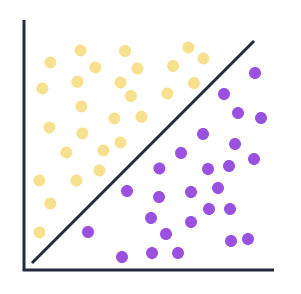

... it might look like this:

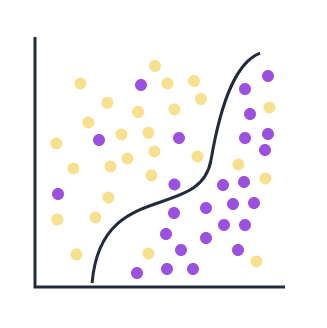

We get an overly complex boundary that tries to classify each point because the **model is struggling to generalize the data**. It starts to memorize specific aspects or features of the data.

The model in this situation, is **overfitting** to the training data.

On the other hand, for large values of `K`, we might get a smoother decision boundary:

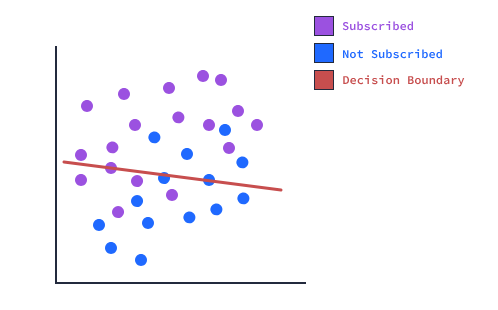

In this situation, the model struggles to represent the data well enough, leading to relatively poor performance. The model is **underfitting**. It doesn't have enough complexity to reasonably capture relevant patterns or insights from the training set.

### Fine-tuning and Evaluation on Test set

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

banking_df = pd.read_csv("/content/subscription_prediction.csv")
X = banking_df.drop(["y"], axis=1)
y = banking_df["y"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state = 417)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*X.shape[0]/X_train.shape[0], random_state = 417)

X_train = pd.get_dummies(data = X_train, columns = ["marital", "default"], drop_first = True)
X_val = pd.get_dummies(data = X_val, columns = ["marital", "default"], drop_first = True)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train[["marital_married", "marital_single", "marital_unknown", "default_unknown", "age", "duration"]])

X_val_scaled = scaler.transform(X_val[["marital_married", "marital_single", "marital_unknown", "default_unknown", "age", "duration"]])


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_list = [1, 5, 10, 25, 50, 100, 500]

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  print('For k = {}: {}'.format(k, knn.score(X_val_scaled, y_val)))

For k = 1: 0.6923456790123457
For k = 5: 0.7496296296296296
For k = 10: 0.7634567901234568
For k = 25: 0.7683950617283951
For k = 50: 0.7644444444444445
For k = 100: 0.7590123456790123
For k = 500: 0.7150617283950618


Among the tested values, `k = 25` has the **highest validation accuracy**.

In [ ]:
X_test = pd.get_dummies(data = X_test, columns = ["marital", "default"], drop_first = True)
X_test_scaled = scaler.transform(X_test[["marital_married", "marital_single", "marital_unknown", "default_unknown", "age", "duration"]])

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_scaled, y_train)

print('For k = 25:', knn.score(X_test_scaled, y_test))

For k = 25: 0.7718518518518519


## Hyperparameter Optimization

In [ ]:
import pandas as pd

banking_df = pd.read_csv('/content/subscription_prediction.csv')
banking_df['y'] = banking_df['y'].replace('yes',1)
banking_df['y'] = banking_df['y'].replace('no',0)
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10122 entries, 0 to 10121
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10122 non-null  int64  
 1   job             10122 non-null  object 
 2   marital         10122 non-null  object 
 3   education       10122 non-null  object 
 4   default         10122 non-null  object 
 5   housing         10122 non-null  object 
 6   loan            10122 non-null  object 
 7   contact         10122 non-null  object 
 8   month           10122 non-null  object 
 9   day_of_week     10122 non-null  object 
 10  duration        10122 non-null  int64  
 11  campaign        10122 non-null  int64  
 12  pdays           10122 non-null  int64  
 13  previous        10122 non-null  int64  
 14  poutcome        10122 non-null  object 
 15  emp.var.rate    10122 non-null  float64
 16  cons.price.idx  10122 non-null  float64
 17  cons.conf.idx   10122 non-null 

In [ ]:
obj_features = []
for col in banking_df.columns:
    if banking_df[col].dtype=='object':
        obj_features.append(col)
obj_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [ ]:
banking_df.shape

(10122, 21)

In [ ]:
# by default, columns=None; will one-hot encode all object and string dtypes
banking_df = pd.get_dummies(data=banking_df, drop_first=True)

In [ ]:
banking_df.shape

(10122, 53)

### Feature selection with Pearson Coefficient

Pearson Correlation coefficient captures the **linear relationships** between columns and fails to capture any non-linear relationships, which is the case in categorical columns that are one-hot encoded (dummy variables).

There are alternative approaches (such as **Cramér's V**) that are more suitable than Pearson's correlation coefficient **when working with categorical columns.**


In [ ]:
correlations = abs(banking_df.corr())

In [ ]:
# :6 is used since 1st will obviously be the target variable 'y' itself
top_5_features = correlations.sort_values(['y'], ascending=False)[:6].index

In [ ]:
top_5_features

Index(['y', 'nr.employed', 'duration', 'euribor3m', 'emp.var.rate', 'pdays'], dtype='object')

In [ ]:
banking_df_fs = banking_df[top_5_features]
banking_df_fs.head()

,y,nr.employed,duration,euribor3m,emp.var.rate,pdays
0,0,5191.0,151,4.857,1.1,999
1,0,5191.0,307,4.857,1.1,999
2,0,5191.0,217,4.857,1.1,999
3,0,5191.0,293,4.857,1.1,999
4,0,5191.0,195,4.857,1.1,999


In [ ]:
X = banking_df_fs.drop(['y'], axis=1)
y = banking_df_fs['y']

### Data preparation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=417)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state=417)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### Training & Evaluating Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_list = [1,2,3,4,5]
accuracies = {}
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracies[k] = knn.score(X_val_scaled, y_val)
print(accuracies)

{1: 0.8385185185185186, 2: 0.8093827160493827, 3: 0.8632098765432099, 4: 0.8612345679012345, 5: 0.8671604938271605}


### Hyperparameter Tuning

There are certain parameters that we can set or input ourselves when training machine learning models. These parameters can influence the training process and can have an impact on the model's performance. They are called as **hyperparameters**. For k-nearest neighbors, `K` is one such hyperparameter.

This process of tuning the hyperparameter values in order to maximize the model's performance is called **hyperparameter tuning** or **hyperparameter optimization**.

**For k-nearest neighbors:**
1. `weights`: `'uniform'` by default; `'distance'` will weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
2. `p` (Power Parameter): Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. **For arbitrary p, minkowski_distance (l_p) is used.**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_list = [1,2,3,4,5]
accuracies = {}
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=5)
    knn.fit(X_train_scaled, y_train)
    accuracies[k] = knn.score(X_val_scaled, y_val)
print(accuracies)

{1: 0.84, 2: 0.8419753086419753, 3: 0.8523456790123457, 4: 0.8572839506172839, 5: 0.8627160493827161}


### `GridSearchCV`

`GridSearchCV` allows us to input a dictionary of hyperparameters and the values we want to search. Additionally, `GridSearchCV` automatically evaluates the different models on validation sets it creates from the training data.

In [ ]:
import pandas as pd

banking_df = pd.read_csv("/content/subscription_prediction.csv")
banking_df["y"] = banking_df["y"].apply(lambda x: 1 if x=="yes" else 0)
banking_df = pd.get_dummies(data = banking_df, drop_first = True)

correlations = abs(banking_df.corr())

top_5_features = correlations["y"].sort_values(ascending=False)[1:6].index

X = banking_df.drop(["y"], axis=1)
y = banking_df["y"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[top_5_features], y, test_size=0.2, random_state=417)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[3,4,5,6,7], 'weights':['uniform','distance'], 'p':[1,2,3,4,5]}
hpt = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy')

hpt.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
hpt.best_score_

0.8771148171024639

In [ ]:
hpt.best_params_

{'n_neighbors': 7, 'p': 4, 'weights': 'uniform'}

### Evaluation

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
hpt_best_estimator = hpt.best_estimator_

In [ ]:
hpt_best_estimator.score(X_test_scaled, y_test)

0.868641975308642

## Linear Regression

A **regression** (or regression analysis) is a technique that attempts to model the relationship between two sets of variables.

One set of variables, called **features** (or predictors), includes variables that we think influence the value of other variables of interest, which we refer to as the **outcome**.

A regression analysis tries to determine just how these predictors relate to the outcome, and we think of this mathematically as a function:

        Y = f(X) + e
The function `f` is what we call the regression. By using a regression, we're assuming that the value of
`Y` can be split into two components:
1. The first part, `f(X)` describes how the features contribute to the outcome.
2. The second part `e` is called **error** or **noice**.

We also assume that the outcome `Y` is a numerical variable, as opposed to binary or categorical.

In linear regression, `f(X)` assumes a particular form. . It assumes that the outcome `Y` can be described as a linear combination of the predictors, as shown below:

      Y = β_0 + β_1*X + ϵ

where `f(X) = β_0 + β_1*X`. β_0 and β_1 are called the **parameters** of the model. Parameters are the values that are learnt from data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

auto = pd.read_csv('/content/automobiles.csv')
auto.shape

(159, 26)

In [ ]:
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [ ]:
X = auto.drop(['normalized_losses'], axis=1)
y = auto['normalized_losses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=726)

In [ ]:
y = f(x)+e
e = y-f(x)
loss function: L = e^2 = (y-f(x))^2 - SSE

library (sklearn) -> module (linear_module) -> classes (LinearRegression)
These classes are only blueprint & has to be instantiated before using (object creation) -> lr = LinearRegression()

slope = (y2-y2)/(x2-x1); therefore the coefficients of features in linear regression model
can be said as the change in value of the outcome for a unit change in feature value (x2-x1=1)

In case of multiple linear regression, the coefficient of a feature represents the change in the
expected value of outcome (y) for a unit change in the corresponding feature given that all other
features are 'controlled' for i.e. value of other features remains unchanged

# Optimizing ML Models

## Feature Engineering

Feature engineering is the process of taking features or predictors in the data and transforming them into a format that improves predictions. Feature engineering is also known as feature extraction. A feature or predictor is a numeric representation of our raw data. Features can be continuous or categorical, but feature engineering requires us to look at other aspects of these data. This includes the following:

* **Sign**: refers to a feature's positivity or negativity. This can be important when we use aggregated values or count values, like daily visits to a website or to a restaurant.
* **Scale**: refers to a feature's size might be. We might need to check if different features span different orders of magnitude since this might affect prediction accuracy.
* **Distribution**: refers to how common specific values of a feature are relative to others. We may find that a feature takes values in some typical range, and that there might be outliers that are far away from this typical set.

We'll be working with the California Housing Dataset

In [ ]:
import numpy as np
import pandas as pd

housing = pd.read_csv('housing.csv')

### Imputation

In [ ]:
housing.info()

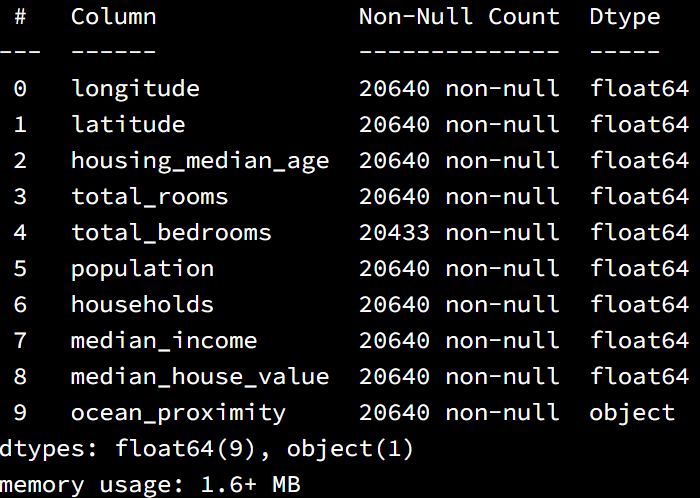

In Python, `None`, `null`, or `NaN` values are typically used to represent a missing value.

Traning a model on only observations where all the data is present is called a complete case analysis. Complete case analysis isn't necessarily a bad thing, but it can result in bias and reduced efficiency in the model if we have to remove large portions of the data.

The alternative to complete case analysis is to try to "fill in" the missing data and train the model on this filled-in dataset. This process is called imputation.

In [ ]:
# dropping ocean_proximity since its a categorical variable
housing.drop(['ocean_proximity'], axis=1, inplace=True)

#### Univariate Imputation

**Univariate Imputation** only uses information from a single column to perform the imputation, and this column is usually the one with the missing values. In univariate imputation, we can choose to fill in missing values based on some statistic such as the mean, median, or mode. These statistics represent the average or most frequent value of a feature, so these are not bad predictions to make.

The scikit-learn library provides objects for us to implement imputation using the impute module. Specifically, we'll use the SimpleImputer class. In order to instantiate a `SimpleImputer()` object, we need to specify two arguments:

* `missing_values`: what values indicate missing values?
* `strategy`: how should we fill in these missing values?

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")

The `fit_transform()` method of imputer classes like `SimpleImputer` returns an **array of arrays** instead of a pandas DataFrame. We'll convert this array of arrays back to a DataFrame and ensure that the column names correspond to the original dataset.

In [ ]:
imputed_housing = pd.DataFrame(imp.fit_transform(housing), columns=housing.columns)

#### K-Nearest Neighbors imputation

The idea behing K-Nearest Neighbours is that if we are trying to impute a feature for an observation, we should look at other observations that are similar or "close" to it (i.e., its neighbors). If these neighbors have values for the feature of interest, we can make a more educated prediction of what the missing value should be. Specifically, we take the average of the neighbor's features and use this to impute for the one with the missing value.

Univariate imputation uses all of the observations to form the average, while the K-nearest neighbors only uses the observations it counts as neighbors.

In order to use K-nearest neighbors imputataion, we use the `KNNImputer` class, which is in the `impute` module from scikit-learn. The API for the `KNNImputer` class is similar to the one for `SimpleImputer`.

In [ ]:
from sklearn.impute import KNNImputer
imp = KNNImputer(missing_values=np.nan, n_neighbors=3)

In [ ]:
imputed_housing = pd.DataFrame(imp.fit_transform(housing), columns=housing.columns)

### Outliers

Outliers are observations that stand out from the concentration of other observations. As such, outliers can be extremely small or extremely large. Outliers can be troublesome because they can influence the estimation of model parameters, which harms model predictions. Therefore, we might consider removing outliers from our data — or at least being aware of their presence.

#### Box Plots

In either case, we have to first identify outliers in our data. This is the process of outlier detection. Since outliers represent either extremely low or high values, one way we can detect them is by generating **box plots**, also known as **box and whisker plots**

In [ ]:
housing.boxplot('median_house_value')
plt.show()

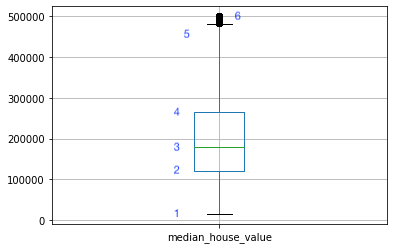

The numbers denote the following:

1. This line is a lower bound, which we'll discuss below.
2. The lower end of the box is the 25th quantile of median_house_value, also known as Q1.
3. The middle of the box is the 50th quantile, also known as the median or Q2.
4. The upper end of the box is the 75th quantile, also known as Q3.
5. This line is an upper bound, which we'll also discuss below.
6. These dots represent observations that go past the upper bound, which we classify as outliers.

**Interquartile range (IQR)** is calculated as `Q3 - Q1`, and we may think of it as the range of values that contain the central 50% of the observations.

In order to calculate the lower bound in the box plot, we subtract 1.5 x IQR from Q1. Similarly, to calculate the upper bound, we add 1.5 x IQR to Q3. **Any values that are outside of these bounds are considered outliers.**

The `percentiles` array defines the percentiles that we want returned, while `data_quartiles` contains the actual values that represent these percentiles.

In [ ]:
percentiles = [25, 50, 75]
mhv_quartiles = np.percentile(housing['median_house_value'], percentiles)

mhv_iqr = mhv_quartiles[2]-mhv_quartiles[0]  # IQR = Q3-Q1
lower_bound = mhv_quartiles[0]-1.5*mhv_iqr   # lb = Q1 - 1.5*IQR
upper_bound = mhv_quartiles[2]+1.5*mhv_iqr   # ub = Q3 + 1.5*IQR

#### Z-Scores

Whereas a box plot uses the quartiles to define outliers, we can also define outliers in terms of a normal distribution.

A normal, or Gaussian, distribution is a probability distribution with a characteristic "bell-shaped" curve. The peak of the bell is centered on the mean of the normal distribution, and the spread of the data around the mean is dictated by its variance.

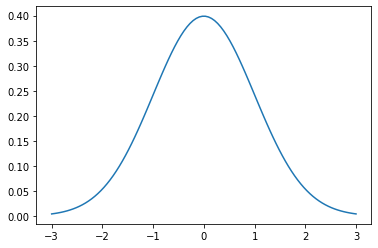

A normal distribution has several qualities that make it useful for characterizing data. One of these qualities is that normally distributed data are highly concentrated around its mean. Concentration around the mean results in the 68-95-99 rule (1σ-2σ-3σ), which states the following:

* 68% of normally distributed data falls within 1 standard deviation (i.e., the square root of variance).
* 95% of normally distributed data falls within 2 standard deviations.
* 99% of normally distributed data falls within 3 standard deviations.

That is, virtually all the data will fall within three standard deviations of the mean. Note that **we must make the assumption that the data is normally distributed for this rule to hold.** Knowing that 99% of normally distributed data is within three standard deviations of the mean, we can use this fact to detect outliers.

To calculate the number of standard deviations that an observation is away from the mean, we can calculate something called the Z-score. This value actually represents how many standard deviations the original observation is away from the mean. Doing these two operations is also known as centering and scaling. We calculate the Z-score as follows: Z = (X - μ) / σ



In [ ]:
mhv_mean = housing['median_house_value'].mean()               # mean of the column
mhv_std = housing['median_house_value'].std()                 # standard deviation of the column
zscores = (housing['median_house_value']-mhv_mean)/mhv_std    # z-score calculation; centering and scaling
mhv_num_outliers_zscore = sum((zscores>3)|(zscores<-3))       # number of outliers in z-score method

This value actually represents how many standard deviations the original observation is away from the mean. Doing these two operations is also known as centering and scaling.

Z-scores can also have a sign as well, which indicates where the observation is relative to the mean. For example, if an observation had a Z-score of 1, it indicates that the observation is 1 standard deviation above the mean. A Z-score of -2.5 indicates the observation is 2.5 standard deviations below the mean.

Using the 68-95-99 rule, any observation that has a Z-score outside of the range -3 to 3 will be marked as an outlier. In fact, **the reason a 1.5 factor is used in the box plot method for detecting outliers references this idea.** It turns out that **1.5 is approximately the factor needed to cover 99% of the data based on the quartiles instead of the mean and standard deviation**. So, both outlier detection methods use this idea that the outliers will stray extremely far from the middle of the data.

#### Handling Outliers

Handling outliers can be difficult because we have to carefully examine the data and make a judgment:
* **Case 1 - outlier stem from a data collection error**:  
If the outlier represents some kind of random mistake from data collection, then we can treat it like a missing data problem. The data is observed, but it's incorrect, so we can try to remove this observation or use the imputation methods we learned earlier. Sometimes it's easy to spot this type of outlier. If all of the values of a column range from 0 to 10 except for an outlier that has a value of 10000, then we should either remove it or impute it.
* **Case 2 -outlier results from the underlying nature of the data:**
The more difficult case is when we believe that the outlier may have happened naturally for that feature; extreme values are normal in some cases. For example, stock prices may vary, historically, within a small range for most of its existence. Then, rare events like a recession may suddenly spike or flatten the price. In this case, some force is causing the extreme value, not some random measurement error. If we were to ignore these extreme stock prices in a machine learning model, we run the risk of heavily biasing the model because we are essentially ignoring an important phenomenon that caused the change.

Because of this, we must resolve outliers on a case-by-case basis. Every dataset is created under different circumstances, so the best thing we can do is examine the data and make a judgment. Here are a few heuristics to follow:
* As mentioned above, if the outlier seems to be the result of a random mistake, then exclude it or use imputation to make a better guess as to the outlier value.
* In the presence of outliers, repeat the analysis under different circumstances: try including them, and then try excluding them. There may be a lucky case where the outlier does not really affect the model predictions. Otherwise, it's important to document this finding.
* Be transparent; Use either a box plot or the z-score to identify outliers and make it clear in your report how many there are and which columns contain them. If your model predictions seem off, then they might be a potential cause. In either case, documenting whether or not you include them can help your teammates decide how to proceed.

You may have noticed that the box plot and Z-score methods we used to identify outliers on the previous two screens had starkly different results. The box plot method found 1071 outliers, while the Z-score method found none! One of the reasons behind this discrepancy is an implicit assumption we need to make when using Z-scores: we assume the data is normally distributed. Let's check this assumption by looking at the histogram for median_house_value:

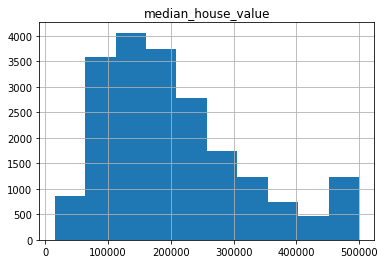

We can see from the histogram that `median_house_value` is actually skewed to the right, meaning that there are more extremely high values than would be expected in a normal distirbution. **If the normality assumption is violated, then Z-scores aren't as useful as an outlier detection tool and can even yield false conclusions**. *As a general rule, we suggest using the box plot method to evaluate if there are outliers in your dataset*. **Since the important points of a box plot are decided by the quartiles, they will be less influenced by extreme values unlike the mean and standard deviation.**

### Imbalanced Datasets

We might encounter a dataset where either the cases (True) or non-cases (False) form a majority of the dataset (context of classification task). This can happen in contexts when cases are uncommon, such as with rare diseases or events. When this happens, we refer to the dataset as being imbalanced.

Imbalanced datasets can hurt predictive ability because the minority class has less data, making it harder to determine how to use the predictors to distinguish them. An imbalanced dataset can also be problematic because it affects how we typically interpret standard performance metrics like accuracy. For example, if a dataset contained 90% non-cases and only 10% cases, a naive classifier might predict that every observation in the dataset is a non-case. The accuracy of this naive classifier would already be 90%, even if we don't use any information in our prediction.

Imbalance can vary in terms of severity as well. A good heuristic for diagnosing this imbalance is to check the percentage of the minority class, the class with a smaller amount of observations in the data:

* 20–40% of the data is in the minority class = mild imbalance
* 1–20% of the data is in the minority class = moderate imbalance
* < 1% of the data is in the minority class = extreme imbalance

To alleviate imbalance, we'll learn two related feature engineering techniques.
1. Downsampling
2. Upweighting

**Downsampling** is the process of reducing the number of majority class observations so that the proportion of the data we use is closer to the proportion of the minority class. To downsample a dataset, we need to choose what proportion of the data we want to be the majority class. Then, we remove enough observations to achieve this.

**Upweighting** involves giving more "weight" to the minority class. To understand weights, we can think of every observation in a dataset as having a single "vote" of influence. When we train models, each of these observations are treated equally and are used only once. Now, when we upweigh an observation, say one from the minority class, we are giving it more "votes" of influence. Instead of being used only once, an upweighted observation will be used multiple times. As a result, the upweighted minority class will have "more" observations present in the data, without needing to collect more data.

The `LogisticRegression` class in scikit-learn has an argument for changing the weights of each observation: the `class_weight` argument. We can assign it a dictionary of numbers for the weights or, as we recommend, assign it the argument "balanced." This will calculate the weights automatically based on the the class proportions.

In [ ]:
model = LogisticRegression(class_weights="balanced")
model.fit(X, y)

As a heuristic, the model should be fit before we try downsampling and upweighting. If the predictive accuracy is still acceptable on the test set, then they might not be needed in the first place. If not, then we should try them out to see if it improves the model.

In [ ]:
# Example for Downsampling Majority
# Downsample majority_housing so that it represents 60% of the data. After the downsampling, reassign the DataFrame
# to the variable downsampled_majority.

n_min = sum(housing["near_ocean"]==1)
n_maj = int(np.ceil((0.6 / 0.4) * n_min))

minority_housing = housing[housing["near_ocean"]==1]
majority_housing = housing[housing["near_ocean"]==0]

downsampled_majority = majority_housing.sample(n=n_maj, random_state=1)

## Model Selection

When we explore the data, we often use visualizations to see how individual features relate to the outcome of interest. With these visualizations, we can pick out features that seem to be strongly correlated with the outcome or help distinguish between cases and non-cases. **A weakness of this approach is that it's difficult to consider how these relationships change as we add features to a model**. For example, we might notice that two features each show a strong correlation with the outcome of interest:

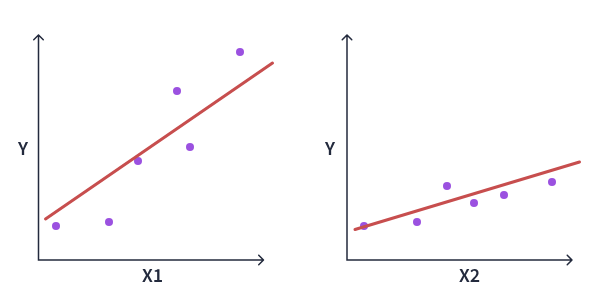

Intuitively, we might want to include both features, X1 and X2, in a regression model. What this approach fails to consider is that **X1 and X2 might be correlated with each other**. If this is the case, having X1 in a model alone will produce similar results to having X2 in a model, but including them both won't add extra benefit. We might mistakenly believe X2 is a useful feature and attempt to use it in future models, **making them more complex than they need to be**.

### Sequential Feature Selection

* This weakness highlights a need for an approach that selects groups of features for a model. This process is called **sequential feature selection**, also known as **subset selection**.

* There are two main methods of sequential feature selection that we'll learn: **forward selection** and **backward selection**. Both methods produce a model with a subset of features that perform well based on some metric, such as MSE, but they differ in their approach to how the features are chosen.

**Forward Selection**

* In forward selection, we start with an intercept-only model (a regression model without predictors). Then, the algorithm iterates over each feature in the dataset to see which one would produce the best model if it were added.

* After iterating through each feature, the one that produces the best metric is added to the model. Once this feature is added, this process is repeated until we reach some pre-specified number of features or the metric does not improve substantially with the addition of more features.

*The class that implements forward selection is the `SequentialFeatureSelector` class. No fitting is done yet, so we must call the fit() method in order to actually perform the feature selection. In order to see what features were actually included in the model, we can use the `get_feature_names_out()` method

For now, we'll consider three parameters when dealing with the SequentialFeatureSelector class:

1. `estimator`: this is an object used to construct the models during feature selection, such as LinearRegression or RandomForestClassifier.
2. `n_features_to_select`: this is a positive integer that describes how many features we want to be used in the resulting model.
3. `direction`: this is a string that describes the type of sequential feature selection we want to do ("forward" or "backward") as a string.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
model = LinearRegression()
forward = SequentialFeatureSelector(estimator=model, n_features_to_select=4, direction='forward')
forward.fit(X, y)
forward_features = forward.get_feature_names_out()  # array(['housing_median_age', 'total_rooms', 'total_bedrooms', 'median_income'], dtype=object)

**Backward Selection**

Backward selection then removes a single feature from the model and reevaluates the metric. The algorithm repeats this process for every feature present in the full model. This results in several metrics, each evaluated on a model where a single predictor is removed. Backward selection chooses the model with the best metric and repeats until we reach the desired number of features specified by the `n_features_to_select` argument.

In [ ]:
backward = SequentialFeatureSelector(estimator=model, n_features_to_select=4, direction='backward')
backward.fit(X, y)
backward_features = backward.get_feature_names_out()  # ['longitude', 'latitude', 'total_bedrooms', 'median_income']

# only 2 features - 'total_bedrooms', 'median_income' are common in forward_features and backward_features

* Forward and backward selection don't necessarily select the same features and are forms of **greedy algorithms**.

* Both of these algorithms make decisions based on the current set of features, and they choose whichever feature best improves the metric immediately. This does not guarantee that the subset of features chosen is actually the optimal subset.

* To find the optimal subset of features, we would need to test all different combinations of predictors. If there are p predictors, then we would need to evaluate 2^p models. This can be time-consuming for even a moderate number of predictors, so greedy approaches like forward or backward selection get around this problem by choosing from current subsets.

### Criterion-based Selection

#### AIC

We usually compare the error made by different models on the test set to select the best model. However, there are some occasions when we might need another tool. One such occasion is **when we have limited data, and by extension, don't have much data to allocate to a test set**. When this happens, we may want to use a **criterion-based approach for model selection**. We'll compute some criterion (other than test error) for every candidate model that we have and then choose the model that produces the best criterion.

 The **Akaike Information Criterion (AIC)** is a value that estimates the prediction error of a model. Since we're usually interested in predictive ability, the AIC is a tool we can reasonably use for model selection. We calculate the AIC like this:

 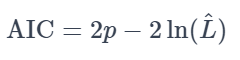

where `p` represents the number of features used in the model, and `L` represents the likelihood of the model. Taking the natural log (i.e., ln) of `L` gives us the log-likelihood. Without delving into the specifics, the log-likelihood captures how well the model "fits" the data. In most cases, **calculating `L` is complicated and can be done using helpful functions in Python**.

For linear regression, the AIC can be written in terms of the SSE as follows: `AIC = 2p + nln(SSE)`; where n represents the number of observations in the data.

When comparing multiple models, the best model as judged by AIC will be the one with the smallest AIC. **When using the AIC, smaller is better.**

Criteria like the AIC are useful when we don't have a lot of data

`scikit-learn` doesn't have built-in functions to calculate AIC; have to calculate manually using helper functions as in the below case:

In [ ]:
# comparing a linear regression model with 2 and features

def AIC(p, n, SSE):
    return 2 * p + 2 * n * np.log(SSE)

sfs2 = SequentialFeatureSelector(estimator=model, n_features_to_select=2, direction='forward')
sfs5 = SequentialFeatureSelector(estimator=model, n_features_to_select=5, direction='forward')
sfs2.fit(X, y)
sfs5.fit(X, y)
features2 = sfs2.get_feature_names_out()
features5 = sfs5.get_feature_names_out()

X2 = X[features2]
X5 = X[features5]
lm2 = LinearRegression()
lm5 = LinearRegression()
lm2.fit(X2, y)
lm5.fit(X5, y)

n = X.shape[0]  # no of observations on data

sse2 = n*mean_squared_error(y, lm2.predict(X2))
sse5 = n*mean_squared_error(y, lm5.predict(X5))

aic2 = AIC(2, n, sse2)  # 1329179.5469891143
aic5 = AIC(5, n, sse5)  # 1324598.2452884852

# linear model with 5 features is better than model with 2 features since its AIC is lower (aic5<aic2)

#### Others

**Bayesian Information Criterion**

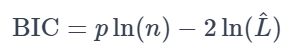

* Compared to the AIC, this first term will be larger provided n≥8.
* Similar to the AIC, the model with the smallest BIC will be considered the best.
* The BIC can be seen as more critical of larger models, due to `p ln(n)` being much larger than 2p. As a result, models chosen via BIC tend to have fewer features than those chosen by AIC, but this isn't a concrete rule.

**Adjusted R2**

The coefficient of determination, R^2, is another value that we can **calculate for linear regression models**. This value **estimates how much variation in the outcome the predictors can explain**. The coefficient of determination is calculated like this:

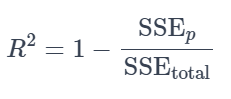




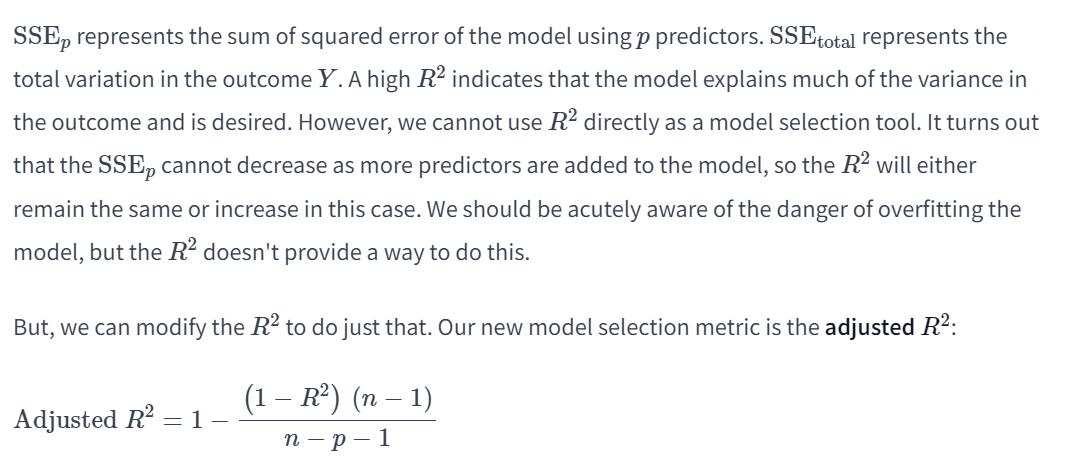

* The adjusted R2 incorporates a term involving the number of features (p) that serves to penalize complex models. If the model gets larger without offering enough benefit to reducing error, it decreases the adjusted R2. So, when we're picking among many models with different numbers of predictors, **we can choose the one with the highest adjusted R2**.
* The adjusted R2 can, in theory, reach an upper threshold of 1, but this would imply that the model produces perfect predictions, and there would be no need for model selection. However, in practice, no model is a perfect predictor.
* **When we use AIC or BIC, we choose models based on the smallest value. When using the adjusted R2, we must choose the model with the largest value.**
* Another characteristic that these criteria share is that they are relative measures. There is no such thing as a model that produces the best absolute AIC, BIC, or adjusted R2; they can only be used to compare candidate models with each other.
* Furthermore, **these measures are specific to linear regression**. If we're working with **other types of models**, then we may need to **stick to forward selection or cross-validation**.

### Curse of Dimensionality

* In some cases, such as linear regression, high dimensionality prevents us from even creating a model when n < p. The math simply won't allow it. When this happens, we are prevented from using model selection features like backward selection since we can't construct the model in the first place.

* A common theme when dealing with high dimensionality is to strategically reduce the number of features we need to consider for the model. This process is called **dimension reduction**. One popular technique for dimension reduction is principal component analysis (**PCA**).

* PCA seeks to reduce the dimensions of the data by creating a new dataset with features based off of the original data. This new dataset will have fewer features than observations, which allows us to use all of the techniques we've learned so far.

* A feature created by PCA is called a **principal component**. A principal component z is a linear combination of the original features (X). So, the first principal component z1 would be constructed as:

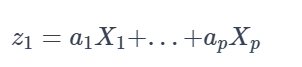

*  The weights a1,...,ap are chosen by PCA such that the **first principal component contains the most variance in the original dataset**. Having high variance means that the values of z1 will be highly spread out. Being more spread out allows us to see how the outcome Y can vary with z1 while preserving the variance in the original dataset.

* After the first principal component is made, the second is constructed similarly, using all of the variance remaining after the first one is created. The other principal components are created iteratively in this way.

* When the number of principal components equals the original number of features p, then the original dataset is essentially recreated. We can reduce dimensionality by only choosing a small number of principal components that explain some high degree of variance in the original dataset, say 90%.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)

* To understand how much variance is explained by each principal component, we can use the `explained_variance_ratio_` attribute. This attribute returns an array of values, one for each principal component.

* To get the total variance explained, we can take the `sum()` of the `explained_variance_ratio_` attribute to get a float value that represents the percentage of the variance being explained.

In [ ]:
var=[]
for i in range(1,6):
    pca = PCA(n_components=i)
    pca.fit(X)
    var.append((i,sum(pca.explained_variance_ratio_)))

# var: [(1, 0.9502570701846094), (2, 0.9948676318065044), (3, 0.9995477987293242), (4, 0.9999769163447296), (5, 0.999998325575994)]
# n=1 explains about 95% of variance & n=2 explains about 99% of the variance in the dataset

## Cross Validation

Instead of using just one test error to judge the model (which can be biased due to the presence of an outlier/missing data), we can create a better picture of model performance by using multiple training and test sets using the original dataset and separate rounds of training. With multiple rounds of training comes multiple test errors, which we can examine to understand not only how well the model performs, but how well this performance varies. This is the core idea behind **K-fold cross-validation**.

By dividing the data into different random subsets as in the following example:

In [ ]:
mses=[]
y = housing['median_income']
X = housing[['median_house_value', 'housing_median_age', 'total_rooms', 'population']]

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)  # random state ensures different subset of data choosen each time
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mses.append(mean_squared_error(y_pred, y_test))

print(mses) -> [1.8074374442080234, 1.7985793337449583, 1.7335436908535047, 1.6954917890318928, 1.6675687112172874]

A more principled way to approach this would be to divide the entire dataset into evenly sized groups of observations called **folds**. Folds are equal, mutually exclusive divisions of the data.

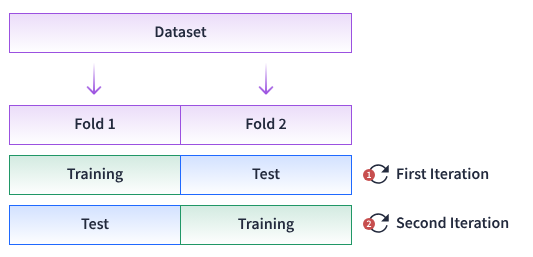

By dividing the data this way, each fold will be used for both training and testing purposes. This approach enables us to have two estimates for the test error — one for each iteration of training. We can take the average of these estimates to give us a better estimate of the predictive ability of the model. Even if an outlier causes one MSE to be higher than expected, taking the average will help balance this out. This approach is called **two-fold cross-validation**.

In [ ]:
# implementation of two-fold cv without sklearn module

mid = int(housing.shape[0]/2)
X_1, X_2 = X.iloc[:mid], X.iloc[mid:]
y_1, y_2 = y[:mid], y[mid:]

model1 = LinearRegression()
model2 = LinearRegression()

model1.fit(X_1, y_1)
model2.fit(X_2, y_2)

first_fold_test_mse =  mean_squared_error(y_2, model1.predict(X_2))
second_fold_test_mse =  mean_squared_error(y_1, model2.predict(X_1))
avg_mse = (first_fold_test_mse+second_fold_test_mse)/2

**k-fold cross-validation**: The dataset will be divided into k folds of equal or approximately equal size. Then one fold will be used as the test set, while the remaining k-1 folds will be used for the training set. With k folds, we'll also get k test MSEs, which means we can calculate not only their average but also their standard deviation. While k is generally considered arbitrary, a general rule is to use k=5 or k=10.
.

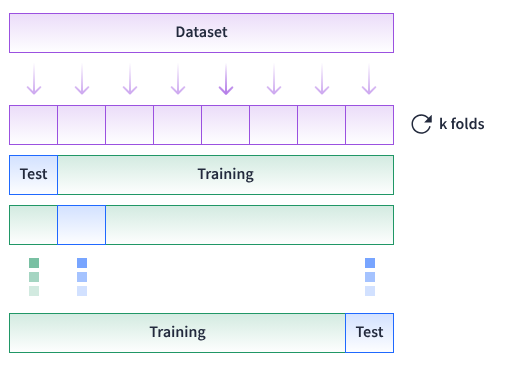

We implement K-fold cross-validation with the `cross_val_score()` function, which is contained in the model_selection module.

* `estimator`: this should be a model that we want to perform cross-validation on, like LinearRegression or LogisticRegression. The model doesn't need to be fit to data, just instantiated from the class.
* `X`: this is the predictor variable(s) that we'd like to use in the model.
* `y`: this is the outcome of interest
* `cv`: this corresponds to how many folds we want to use in the cross-validation. While this already defaults to 5, it's good to know just in case you'd like to change it.
* `scoring`: this corresponds to the metric that we should use to judge the model. This is important because we might be interested in other types of metrics other than the default for the model.

In [ ]:
# sklearn implementation of k-fold cross-validation

from sklearn.model_selection import cross_val_score

model = LinearRegression()
housing_cv = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_avg = housing_cv.mean()
cv_std = housing_cv.std()

**Reason to choose cv=5 or cv=10**



In [ ]:
k2 = cross_val_score(model, X, y, cv=2, scoring='neg_mean_squared_error')
k10 = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
k100 = cross_val_score(model, X, y, cv=100, scoring='neg_mean_squared_error')

avgs = [k2.mean(), k10.mean(), k100.mean()] -> [-1.7694926907345756, -1.7353302443167784, -1.7155563446802404]
stds = [k2.std(), k10.std(), k100.std()]    -> [8.722230345692417e-05, 0.5592805268664521, 1.2302469333308632]

K-fold cross-validation comes with one form of the bias-variance tradeoff. As the number of folds used in K-fold cross-validation increases, the variance of the resulting test errors increases. At the same time, taking the average of this large number of test errors gives us a more accurate estimate of what it might be when used on unseen data. In other words, **increasing the number of folds reduces the bias of the average test error, but it increases their variance**. With a small number of folds, these trends are reversed.

Researchers have performed numerical simulations and found that **k=5 or k=10** produce this desired balance.

## Regularization

 High dimensional datasets have many features, possibly greater than the number of observations. In these cases, many features might be helpful in predicting the outcome, but it might be difficult to pick all of them out. We might try to use an automated procedure like sequential feature selection to choose features, but these algorithms are computationally expensive in high-dimensional contexts and might not be a good use of our time.

 **Regularization** is the process of simplifying a model so it generalizes better to unseen data. Simplifying a model helps us overcome high-dimesional issues because it allows us to discard features that don't contribute to the model's predictive ability.

 One way to simplify the model above is to **force some of the coefficients to be close to zero or equal to zero**. Forcing coefficients to be close to zero (or equal to zero) essentially removes the associated feature from the model, which ultimately simplifies it. Regularization is also called **shrinkage**, owing to the fact that coefficients are shrunk to zero or close to it. *Maths behind this in ML book.*

The difference between a normal Linear Regression and a regularized model- Lasso and Ridge is the loss function.

The loss function of linear regression is as follows:

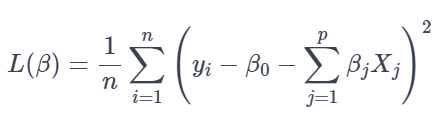


### Ridge

The loss function for ridge regression is similar, but it adds an extra penalty term to the MSE. The ridge regression coefficients minimize:

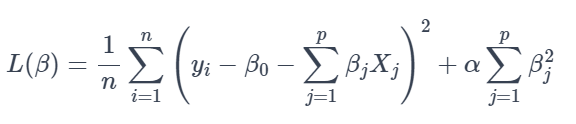

* This second penalty term is how ridge regression regularizes its coefficients. When the coefficients get large, this penalty term also gets larger as a result. Unless a larger coefficient significantly reduces the MSE, the coefficients will be shrunk towards zero.

* The penalty also incorporates a tuning parameter into the penalty term, denoted by α. High values of α will give the penalty term more weight, which encourages smaller regression coefficients, while smaller values of α do the opposite. **The penalty term forces the model to compromise between higher coefficient values to reduce the MSE and raising the value of the penalty term.**

* **α is a hyperparameter for ridge regression, so it should be chosen through cross-validation as opposed to being hand-picked.**

* Notice that when α=0, we get back to the MSE, returning us to standard linear regression.

* `scikit-learn` has a class dedicated for ridge regression: the `RidgeCV` class. The `RidgeCV` class is also contained in the `linear_model` module, the same one as `LinearRegression`. There's another `Ridge` class that implements ridge regression, but **RidgeCV has cross-validation built into it, so this is preferred**.

* With `RidgeCV`, there's a `coef_` attribute that allows us to examine the estimated values of the coefficients of the model. Each feature we use in the model will have a coefficient, and the coefficient values in `coef_` will appear in the same order in which the features are used in the model.

1. `alphas`: this is an array of positive values to test for cross-validation. We can also specify a single value for the argument as well. `RidgeCV` has default values here, but we may want to use a different range or magnitude for the α values we want to validate with.

2. `cv`: this value indicates how many folds to use in cross-validation. By default, `RidgeCV` implements efficient `LOOCV` to determine the best α value to use among the alphas values we provide.

In [ ]:
from sklearn.linear_model import RidgeCV
ridge_1 = RidgeCV(alphas=1)
ridge_1_coef = ridge_1.coef_
print(ridge_1_coef) # -> [ 4.49053028e-02, 2.20252017e-02, -2.05292217e-02,  8.98612185e-04, -5.28894692e-03,  3.90366919e-05,  5.78104934e-04,  9.82946221e-06]

* By default, the value for the alphas argument is `[0.1, 1, 10]`. It's highly likely that the best value for α lies somewhere outside of these values, so we want to outline an approach for finding one.
* The process for finding an optimal tuning parameter is an iterative one. It requires us to assign different lists for the `alphas` parameter with increasing precision until we find an adequate answer.
* Ideally, the optimal value will fall in the middle of the bounds you choose, so you might need to experiment a bit. Once we find a middle value, we can repeat this process using smaller ranges for `alphas` to home in on a value with enough decimal places.
* In order to see the value of `α` used in a fitted `RidgeCV` model, we can use the `alpha_` attribute (notice the underscore).

In [ ]:
ridge_initial = RidgeCV(alphas=np.linspace(10,100,num=100))
ridge_initial.fit(X_train, y_train)
alpha_initial = ridge_initial.alpha_
print(alpha_initial)  # 100.0: which is the extreme value; hence increase the maximum bound and try again

* The coefficients of linear regression are interpreted as average changes to the outcome for unit changes in the features. Therefore, the magnitude of these coefficients depends heavily on the magnitude of the feature.

* This can become a problem if we have features of different magnitudes. We can see this in the housing dataset. The `housing_median_age` column is on a scale of 10s, but the `population` column ranges into the 1000s. This difference in magnitudes can have adverse effects on regularized models like ridge regression.

* The penalty term looks at the magnitude of the coefficients. The coefficient of a feature measured in the 1000s is going to be constrained differently compared to the coefficient of a feature with a magnitude in the 10s. This is undesirable because the coefficients will be penalized differently based on their scale.

* We prevent this issue by making the scale across all of our coefficients the same - Standardization (all of the features change to have an average of 0 (centering) and a standard deviation of 1 (scaling)).

*  Before we fit a model to our data, we should **standardize our data first to make sure that the coefficients are penalized similarly**. Standardization hurts the interpretability of the model because it redefines what a "unit increase" is for the variable.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_X_train = scaler.fit_transform(X_train)

ridge = RidgeCV(alphas=np.linspace(1, 10, num=100))
ridge.fit(standardized_X_train, y_train)
ridge_coefs = ridge.coef_      # [ 0.08881214, 0.04638687, -0.25804876, 1.9682025 , -2.2330032 , 0.04658543, 0.20921368, 1.16764444]
# coef before standardization -> [ 4.49053028e-02, 2.20252017e-02, -2.05292217e-02,  8.98612185e-04, -5.28894692e-03,  3.90366919e-05,  5.78104934e-04,  9.82946221e-06]

### Lasso

LASSO (**Least Absolute Shrinkage and Selection Operator**) penalizes the loss function using the absolute values of the coefficients instead of their squared values.

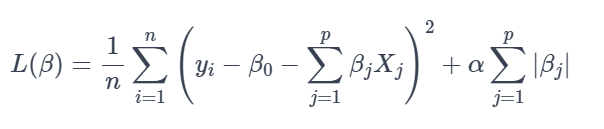

* While this change seems small, it gives LASSO a valuable characteristic that ridge regression lacks: **feature selection**. In ridge regression, if we feed `p` features into the model, then we'll still retain all of them after the regularization. **In LASSO, some of the coefficients might be forced to zero, effectively removing the associated feature from the model.**

* `scikit-learn` implements LASSO in the `LassoCV` class in the `linear_model` module.

* If you believe that some of the predictors truly don't contribute to explaining the outcome, then you should use LASSO.

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

ridge = RidgeCV(alphas=np.linspace(1, 10, num=100))
ridge.fit(X_train, y_train)
ridge_coef = ridge.coef_
lasso = LassoCV(alphas=np.linspace(1,100,num=100))
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

ridge_test_mse = mean_squared_error(y_test, ridge.predict(X_test))
lasso_test_mse = mean_squared_error(y_test, lasso.predict(X_test))

# ridge_coef -> [ 0.08902847, 0.04650392, -0.25867508, 1.95721531, -2.2106973 , 0.04698743, 0.20676188, 1.16702585]
# lasso_coef -> [-0. , -0. , -0. , 0. , -0. , 0. , 0. , 0.29412117]
# ridge_test_mse -> 1.1718853885401839
# lasso_test_mse -> 3.043393783447594
# Ridge Regression performs better than Lasso Regression as seen from the test MSE and the coefficients
# In this case, each of the features did contribute to improving predictive ability, so removing them was actually harmful.

## Beyond Linear Models

### Polynomials

In `scikit-learn`, there isn't an implementation for a polynomial model, but there is a helper class for generating polynomial features. This class is the `PolynomialFeatures` class in the `preprocessing` module.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_X_train = poly.fit_transform(X_train)

In [ ]:
X = housing["households"].values.reshape(-1, 1)
y = housing["total_rooms"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=763)

quad_X_train = poly.fit_transform(X_train)
quad_X_test = poly.transform(X_test)

In [ ]:
print(quad_X_train[0])  # [78, 6084]
print(X_train[0])       # [78]

**A polynomial model still has a linear nature, but it's the features that have been converted into a non-linear form.**

Using the transformed `quad_X_train` data, our model would look like the following:

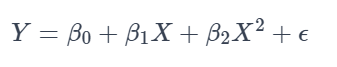

Each of the non-intercept coefficients captures the strength of a different trend.
* β1 corresponds to the strength of the linear trend
* β2 corresponds to the strength of the quadratic trends
* The intercept β0 represents the average value of the outcome when the feature is 0
* ϵ still captures the error of the model not captured by the features.

If there's truly a quadratic trend in the data, then ideally the addition of the quadratic term will further reduce the MSE. If not, then we will see that this quadratic term won't contribute to or could even adversely affect predictive ability.

In [ ]:
linear = LinearRegression()
quadratic = LinearRegression()
linear.fit(X_train, y_train)
quadratic.fit(quad_X_train, y_train)

linear_mse = mean_squared_error(y_test, linear.predict(X_test))             # 758766.037388168
quadratic_mse = mean_squared_error(y_test, quadratic.predict(quad_X_test))  # 745225.0459022186

# quadratic is a bit better than the linear model on comparing the errors

### Piece-Wise

 We can introduce non-linearity in the model just by including quadratic or cubic versions of the feature. However, the inclusion of these polynomial terms comes at the cost of terrible **extrapolations**  — predictions made using feature values outside the range of the training data.

 As we venture farther from the range of the data, polynomial model predictions grow extremely fast, going outside of any realistic value we might observe. Let's take a look at our plot of `households` against `total_rooms` from earlier:

 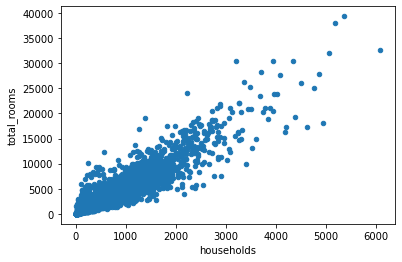

If we were to fit a quadratic model on this data, the resulting model would predict higher values than expected of `total_rooms` for `households` values past 7000.

One way around this is to **use different models to describe different domains (input ranges) of the feature column**. For example, instead of having a single quadratic model for the entire range of households values, we could **use two linear models with a knot that separates the domains** of the two models. We show this visually below:

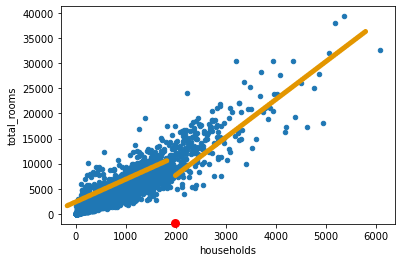

There are two linear models above, one for households < 2000 and one for households > 2000. There is a single knot, denoted by the red dot, that describes the point where the model changes, going from one slope and intercept to another. This is an example of a **piecewise function**.

In [ ]:
# Subdividing the data into different domains
train_lt_2000 = X_train < 2000
train_gte_2000 = X_train >= 2000
test_lt_2000 = X_test < 2000
test_gte_2000 = X_test >= 2000

X_train_lt_2000 = X_train[train_lt_2000].reshape(-1, 1)
X_train_gte_2000 = X_train[train_gte_2000].reshape(-1, 1)
X_test_lt_2000 = X_test[test_lt_2000].reshape(-1, 1)
X_test_gte_2000 = X_test[test_gte_2000].reshape(-1, 1)

y_train_lt_2000 = y_train.loc[train_lt_2000]
y_train_gte_2000 = y_train.loc[train_gte_2000]
y_test_lt_2000 = y_test.loc[test_lt_2000]
y_test_gte_2000 = y_test.loc[test_gte_2000]

# Training the models
lm = LinearRegression().fit(X_train, y_train)
pre2000 = LinearRegression().fit(X_train_lt_2000, y_train_lt_2000)
post2000 = LinearRegression().fit(X_train_gte_2000, y_train_gte_2000)

test_predictions_gte_2000 = post2000.predict(X_test_gte_2000)
test_predictions_lt_2000 = pre2000.predict(X_test_lt_2000)
y_test_recombined = np.append(y_test_lt_2000, y_test_gte_2000)
piecewise_test_predictions = np.append(test_predictions_lt_2000, test_predictions_gte_2000)

standard_lm_test_mse = mean_squared_error(y_test, lm.predict(X_test))                     # 758766.037388168
piecewise_test_mse = mean_squared_error(piecewise_test_predictions, y_test_recombined)    # 740337.1678887036

### Splines

One of the weaknesses of piecewise functions is that they produce **discontinuities**, places where the function will suddenly change in value. In our example, the discontinuity happens at the knot.

Typically, we'd want our predictive model to be continuous instead. We can add additional constraints, or restrictions, on piecewise functions so that they will be continuous. **Placing a continuity constraint** on our example function would force it to look like this:

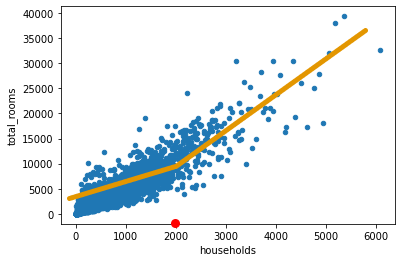

We can see that the function is now continuous at the knot. However, you may also notice that there is now a sharp "elbow" in the function. We also might want our predictive model to be smooth, without this sharp point. We can do this by placing **two more constraints on the function: that both the first and second derivative are continuous at the knot**. Imposing these constraints results in a model that roughly looks like this:

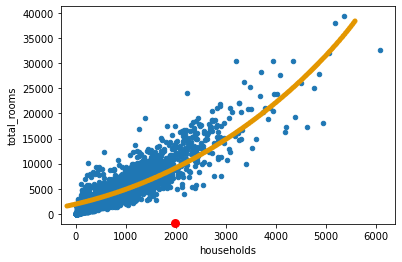

The final product above is still a piecewise polynomial, but it has three additional constraints to force it to be continuous and smooth. This model has a special name: a **spline**. Splines are extremely flexible models that we can use to model complex feature-outcome relationships.

* `degree`: defines the degree of the polynomials that we would like to use in the spline. This value must be a non-negative integer.
* `n_knots`: defines how many knots to place in the model. This value must be greater than or equal to 2.
* `knots`: describes where the knots should be placed. Although we can specify the locations of the knots ourselves, it's often better to have them dispersed uniformly over the values of the feature. By default, `SplineTransfomer` uses `knots="uniform"`.

In [ ]:
from sklearn.preprocessing import SplineTransformer

spline = SplineTransformer(degree=1, n_knots=2, knots='uniform')
spline_X_train = spline.fit_transform(X_train)
print(spline_X_train[:5])

""" The result is an array of lists, similar to how PolynomialFeatures transforms the data.
array([[0.98581031 0.01418969],
       [0.8877894  0.1122106 ],
       [0.9512696  0.0487304 ],
       [0.92176998 0.07823002],
       [0.93147872 0.06852128]])
"""


The spline basis representation represents the spline as a linear combination of functions of features. For example, if we were using two functions, b1(X) and b2(X), to construct the spline, the model would be written like this:

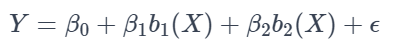

Polynomial regression uses powers of the features as the functions (i.e., b1(X)=X, b2(X)=X^2)

These bi(X) functions have a special name: **basis functions**. In standard linear regression, the basis functions are just the features themselves.

Let's say that we want to use polynomials of degree `d` in the model, and we want to use `k` knots. It turns out that just by specifying these two pieces of information, we can completely describe the resulting spline with `d+k−1` basis functions. In our example above for spline, we specified `d=1` and `k=2`, so we would need two basis functions to describe the spline.

In [ ]:
spline = SplineTransformer(degree=1, n_knots=2)
spline_X_train = spline.fit_transform(X_train)

model = LinearRegression()
model.fit(spline_X_train, y_train)

spline_X_test = spline.transform(X_test)
spline_mse = mean_squared_error(y_test, model.predict(spline_X_test)) # 763927.7064014394

Practically speaking, higher-degree polynomials are too flexible and are prone to overfitting. Instead of increasing the degree of the spline, it would be **good to stick to a simpler polynomial and then experiment with the number of knots via cross-validation**.

Specifically, **cubic splines (d=3) are popular because they hide the knots in the function well**. We recommend sticking to cubic splines unless some expert knowledge or data exploration suggests strongly otherwise. In fact, the default argument for the `SplineTransformer` class is to use a cubic spline (degree=3).

In [ ]:
test_mses = []
for i in range(2,11): # iterating through 2 to 10 for n_knots for the above cases
    spline = SplineTransformer(n_knots=i)
    spline_X_train = spline.fit_transform(X_train)
    spline_X_test = spline.transform(X_test)
    model = LinearRegression()
    model.fit(spline_X_train, y_train)
    test_mses.append([i, int(mean_squared_error(y_test, model.predict(spline_X_test)))])

# [[2, 741172], [3, 741785], [4, 734435], [5, 734640], [6, 733672], [7, 734430], [8, 735268], [9, 736968], [10, 735632]]

# optimal knot size = 6